<a href="https://colab.research.google.com/github/agath3/colab/blob/main/nbs/dive_1_1_img_classification_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Guided Dive</h1>
<h1>Build your own image classifier with deep learning</h1>

# Introduction
This notebook guides you through the main steps required to build an image classifier, using deep learning model. It is based on what practitioners would do every day.

For each step, you will see a short explanation in words, and the corresponding code allowing you to execute/run each step.

If you have never coded before, simply run the provided code.

If you are more experienced, or just more adventurous, go ahead and modify the code or write yours. Do no worry, whatever you do, you cannot dammage the original notebook or what other people are doing. Feel free to break things. At worst, you will have reload the original notebook again and start a new session.

Follow all the steps one by one and you will build your own deep learning model.

## Agenda for the guided dive:
- 📘 **Anatomy of a deep learning application**
- 📷 **Build your Computer Vision model**
    - 📘 Introduction to the project
    - 👨‍💻 Data processing, train model, evaluate model
    - 👨‍💻 Improve model

# 📘 Anatomy of a deep learning model

The main idea behind machine learning is to use **data** (inputs and solutions) to train a **model**.
> <div align="center" width=100%>  <img src="http://www.charlier-tang.com/guided-dive/resources/img/anatomy_dl_01.svg" height=160px>  </div>

**Deep learning** is one type of supervised machine learning which uses an architecture remotely inspired from biological neurons.
> <div align="center" width=100%><img src="http://www.charlier-tang.com/guided-dive/resources/img/aan-small.jpg" height=300px></div>

In the _training phase_, we use **data**, a specific artificial neural network **architecture** and an **optimization algorithm** to train the **model**. The training process give us learned **parameters**.
<div align="center" width=100%><img src="http://www.charlier-tang.com/guided-dive/resources/img/anatomy_dl_02.svg" height=160px></div>

Once we have a trained model (i.e. an **architecture** with **parameters**), we can use it to make prediction on **new data**.

<div align="center" width=100%><img src="http://www.charlier-tang.com/guided-dive/resources/img/anatomy_dl_03.svg" height=160px></div>


For this guided dive session, we will use a library called **fast.ai**. It provides state of the art implementation of deep learning, while also making it possible to access its power from a high level API (simple high level code). It is built on top of `pytorch` and `python`.

<div align="left" width=100%><a href="https://www.fast.ai/"><img src=" https://docs.google.com/uc?export=download&id=1A0kmDbMxFXDJ_TVGAku562V2zPiDrX_V" width=15%></a></div>

**The steps to train a model include:**
1. **Collecting the data and preparing them so that the model can learn from them**
2. **Selecting an architecture and creating a specific model using that architecture**
3. **Training the model by "feeding" the data to the model. We will apply transfer learning**

We will go through each of these steps.

#### 🔎 Details on how each step is structured in the code (optional)


1. Collecting the data: `DataBlock()`
    - defines what type of data, e.g. `ImageBlock` and `CategoryBlock`
    - define how the data is collected, e.g. get the image from a function that will look into a folder the return any image file
    - define how to get the label names, e.g. class name/label name is the name of the folder where the images are
    - some preprocessing to do for each image, e.g. resizing then all to a square image or fixed value
```
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=parent_label,
                    item_tfms=Resize(128)
                    )
```


2. Indicate where the data are, e.g. a path to a specific folder: `dataloaders()`
```
dls = dblock.dataloaders(path)
```


3. Create a model
    - select a specific architecture (for image, CNN Resnet with 18 layers)
    - in this case we use a pretrained model for general images
    - use the data loaders created aboce `dls`
    - specify metrics to see how the training evolve
```
learn = cnn_learner(dls, resnet18, metrics=[accuracy, Recall(), Precision()])


4. Train the model
    - train it for a given number of iterations (epochs)
    - we have a pretrained model, so we only need to fine tune it
```
learn.fine_tune(5)
```

#### 🔎 End of details

#### 🔎 How to create your own notebook and execute code?
If you are not familiar with Colab or hosted Jupyter notebooks, read this section.

This page is a hosted Jupyter notebook. This is a special tooks that allows to write a page with text and illustration but also to run specific code and see the result of your own code. This facility is made available by Kaggle, and provides this convenient space to learn deep learning or other machine learning techniques.


**Step by step instructions**:
1. You got to this page. You have started a notebook in read only mode. You can run it but if you make changes, you will not be able to save them. In the `File` menu, you should see command `Save a copy in Drive`. Select that command and it will create a copy of this notebook in a new window and also save it under your own gdrive. The default name will be `dl-guided-deep-dive-01-cv.ipynb` but you can change it at any time. This is **your version of the notebook**, You can run it and modify it.

2. You have your own copy of the notebook and can run/execute code in it. One of the advantages of Colab is that you have access to GPU computing capabilities (useful to accelerate computer vision models). To get the GPU, see `Change runtime type` in the `Runtime` menu. Select GPU if it is not already done.

    > Once your new notebook is active, you have access to your own computing and storage capacity on a computer in the cloud. It is available to you for a few hours and will stay active unless you do not do anything for 15-30 min or so.

#### 🔎 End of details

# 🧰 Imports and configurations
Just run the cells in this section to get ready. Do not worry about the code here.

In [13]:
try:
    from nb_guided_dive.vision import *
except ModuleNotFoundError:
    !pip install -Uqq git+https://github.com/vtecftwy/nb-guided-dive.git
    from nb_guided_dive.vision import *
try:
    from duckduckgo_search import DDGS
except:
    print('installing duckduckgo_search package')
    !pip install -qq duckduckgo_search
    from duckduckgo_search import DDGS
    print('duckduckgo_search package installed')
try:
    from jmd_imagescraper.imagecleaner import display_image_cleaner
except:
    print('installing jmd_imagescraper package')
    !pip install -qq jmd_imagescraper
    from jmd_imagescraper.imagecleaner import display_image_cleaner
    print('jmd_imagescraper package installed')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.3 MB/s eta 0:00:00
installing duckduckgo_search package
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 16.6 MB/s eta 0:00:00
duckduckgo_search package installed


In [38]:
import os
from duckduckgo_search import DDGS
from fastprogress.fastprogress import progress_bar
from pathlib import Path
from PIL import Image
from shutil import rmtree
from fastai import __version__
from fastai.vision.all import *
from fastai.vision.utils import download_images
from fastai.vision.widgets import ImagesCleaner , ImageClassifierCleaner

print(f"fastai version {__version__}")

fastai version 2.7.15


In [39]:
config_fastai_for_colab()

This notebook should be run on Google Colab


# 📷 Computer Vision: Steps to Build an Image Classifier

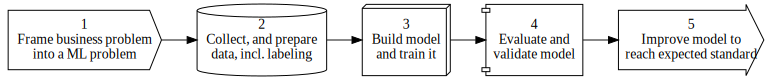

In [16]:
ml_process()

## 1️⃣ Frame the problem

This is the moment when we analyse the problem at hand in details to make sure that we are not spending time and resources on something that is not what is required. We will learn all about this on Wednesday. For the moment, let's says that:
- We have a large number of lemons to ship everyday. They are manually sorted on conveyor belt.
- We want to add a camera above teh conveyor belt and feed a system that will indicate whether a lemon is OK or NOT.


### What we have:
- A conveyor belt
- We can install a camera system above the belt, feeding images to a computer
- We can configure a sorting system that can receive a signal to reroute any lemon that is considered bad

### What could be a problem here?

👷 Think of this question and write your answer in the text cell below.

[Double click here to edit this cell and and write your ideas.]

### How do we state this as a machine learning problem?
- What inputs can we give the DL system?
- What "decision" or prediction de we expect to get from the DL system?
- What type of ML problem is it?
- Type of data we need to feed the DL model?
- What type of performance do we want to achieve? Is ther a minimum performance threshold to reach to succeed?

👷 Think of this write your ideas below

[Double click here to edit this cell and and write your ideas.]

##### ---------------------------------------------------------

## 2️⃣ Collect and Prepare Data, including Labeling

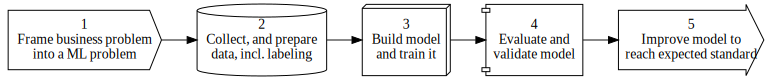

In [32]:
ml_process()

To solve our ML problem, we need a dataset with the following information:
- a set of images with lemons of good quality
- a set of images with lemons that show quality problems (rot, ...)

We should have between roughly 50 and 100 images for each set. We will need to clean up and delete some images from our set, it is safer to start with **100 or 150** images.

### Collect images from internet

Quickest and simplest way to create an initial image dataset is to collect them online.
- Search images with key words or search phrases.
- Download images and organize them in classes/categories based on the searches.
- 👍 : easy and fast. labeling is straigthforward if search well defined
- 👎 : quality of the images depends of the quality of the search engine and the search phrases.

Good for a baseline, and to explore how things work out. Then we will need to improve.

We will use [duckduckgo](https://duckduckgo.com/) search engine which provides good results and is easily reachable.
><a href="https://duckduckgo.com" target="_blank"><img src="https://duckduckgo.com/assets/common/dax-logo.svg" width=5%></a>

We will do the following:
1. Experiment directly on [duckduckgo](https://duckduckgo.com/) to craft a good search phrase for each class
2. Use these two search phrases to scrape images and download them onto the server for furtehr use

#### Experiment with keywords

Experiment on [duckduckgo](https://duckduckgo.com/) directly.

The objective is to define one **search phrase** that generates a good set of images or faces with masks and one **search phrase** that generates a good set of images of faces with not mask. You will notice, for instance, that the search phrase `faces with no mask` will return lots of images with masks 🙁.

For this simple exercise, select **one** search phrase for the class `with_mask` and **one** search phrase for the class `without_mask`. In practice we would conbine the results of several search phrases for each class.

Do not worry if you get a few unrelated images, we will clean this up later.

#### Launch the scraper application
Once you have a good phrase for each of our two classes, save them in the cell below for further use.

In [40]:
# Replace the phrase in red below by your phrase. Keep the appostrophes " "
search_phrase_0 = "lemon rotten"
search_phrase_1 = "lemon whole"

<details>
<summary>Tips if you are stuck:</summary>
<p><code>search_phrase_0 = "lemon rotten"</code></p>
<p><code>search_phrase_1 = "lemon whole"</code></p>
</details>

Give a name for each of your classes. The simple implementation in this exercise require that the class name does not include spaces.

In [41]:
class_name_0 = "bad"  # for class 0 in the binary classifier
class_name_1 = "good"   # for class 1 in the binary classifier

Pick a number of images to download for each class. You can define between 50 and 450 images to download for each class.

In [42]:
number_images_to_download = 100         # this can go up to 450 at the time of writing

The cell below will automate the search and download process for you. It will:
- create a path to the folder where we want the images to be saved
- run the Duckduckgo search for the two classes classes
- check that all images are correctly downloaded and delete any defective ones

In [43]:
def get_images(keywords, label, path, max_results=100):
    results = DDGS().images(
        keywords=keywords,
        region="wt-wt",
        safesearch="on",
        size=None,
        color="color",
        type_image='photo',
        layout=None,
        license_image=None,
        max_results=max_results,
    )
    if len(results) == 0:
        print(f"Not images found for {keywords}")
    else:
        path2imgs = path / label
        os.makedirs(path2imgs, exist_ok=True)
        urls = [r['image'] for r in results]
        print(f"Found {len(results)} images for label {label}. Downloading into {path2imgs.absolute()}")
        download_images(path2imgs, urls=urls)
        print('All downloaded')

In [44]:
def clean_image_directory(path, verbose=False):
    def check_img(img):
        try: _ = Image.open(img)
        except Exception as e:
            img = str(img).replace(" ","\ ")
            os.system(f"rm -f {img}");
            print(f"removing error img:{img}")

    for cls in path.iterdir():
        for i, img in enumerate(cls.iterdir()):
            if verbose: print(i, end=' - ')
            check_img(img)
            if verbose: print('\n')

In [45]:
# rmtree('/content/images')

In [47]:
path = Path()/ 'images'
print(f"All images will be saved into {path.absolute()}")

# Search and download
get_images(keywords=search_phrase_0, label=class_name_0, path=path, max_results=number_images_to_download)
get_images(keywords=search_phrase_1, label=class_name_1, path=path, max_results=number_images_to_download)

# Check that all images can be used and delete any defective image
clean_image_directory(path)

All images will be saved into /content/images
removing error img:images/bad/083391f8-2d29-42a7-960b-b53d124ac229.jpg
removing error img:images/bad/779bb3ef-e330-41cf-a2ed-8b96f02a9ae0.jpg


In [48]:
count_files(path)

94 in folder good
85 in folder bad


Why is the number of images not 100 for each class?
- some images were deleted because we could not open the file
- several links in the search results may have pointed to the same image file

Now we have downloaded our images into a folder called `images` and
- all images of for class with mask are grouped into `images/with_mask`
- all images of faces without mask are grouped into `images/without_mask `

We are ready to start with the model

### Prepare data to feed the model.
Computer only do what they are told to do, therefore we need to tell it:
- what type of data we use,
- where it can find the data , and
- what to do with it.

We do that with a **`DataBlock`**.



In this example, the code below tells the computer:
- we have **images** as input
- all images files are in a specific folder
    - the computer retrieves images by using a function **`get_image_files`** which returns a list of all the images in a given folder
- for each image, we have one *label* a.k.a. *class* a.k.a **`category`** a.k.a. **`y`**
    - the computer will know which is the class of each image by looking in which **folder** it is located
    - this is retrieved by using a function **`parent_label`**
- before using each image, the computer should **resize** it into a standard square of size 128 pixels
- finaly, we want to keep a **validation set** of 30% of the images. These images will **not** be used for training, but they are only used to test whether the trained model generalizes well on new images.

In [49]:
fn_list = get_image_files(path)
fn_list[:3]

(#3) [Path('images/good/eb91934c-5bf1-49c7-a3ee-2daa9dab53ba.jpg'),Path('images/good/4006601f-f537-40cc-bcd9-550c2ed08c8a.jpg'),Path('images/good/32eff3fa-03d3-4906-96ad-f11eed605c48.jpg')]

In [50]:
parent_label(fn_list[0])

'good'

In [51]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(128),
                   splitter=RandomSplitter(valid_pct=0.30, seed=88),
                   )

Now the computer has a **recipe** to handle images in a specific folder. It has not done anything yet.

We have put our images in `path`. Now we tell the computer to apply the recipe (`dblock`) to a specific folder (`path`):
- go to `path`
- identify all images there
- build a dataset for training and a dataset for validation
- get ready to resize the data
- use the images in groups of 16 at the time

What we get after that is called a **`dataloaders`** (`dls`) because it is the tool the computer will use to load data into the model. It is plural because there are two sets: training and validation.

In [52]:
path.absolute()

Path('/content/images')

In [53]:
dls = dblock.dataloaders(path, bs=16)

The `dataloaders` `dls` gives us access to all images. One thing we can do is to see a random sample of the images and their labels. We can play with the number of images to display (`max_n`).

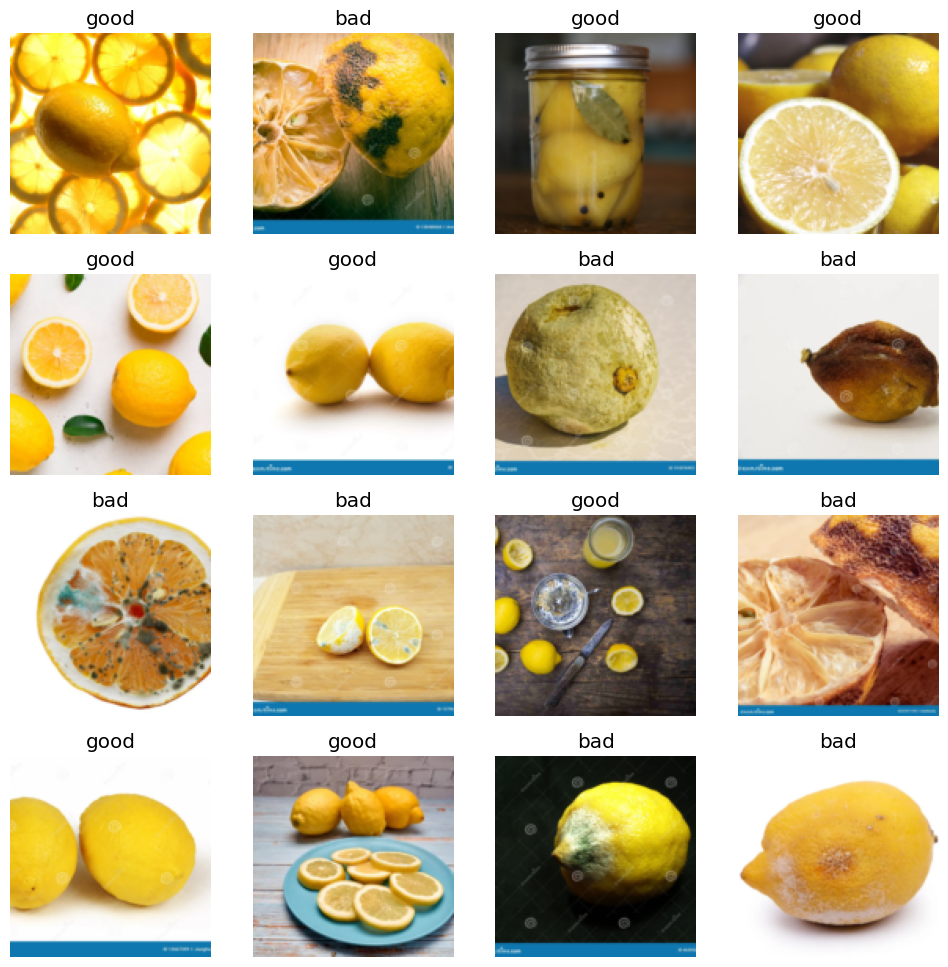

In [54]:
dls.show_batch(max_n=24)

### Clean up data
Some of the images are not what we want, or are wrongly labeled. We can correct or remove them.

Looking above, it clear that some of the images are not correct or not optimum for training. We need to delete some of them.
- images with something not related to the class (e.g. mask but no face, ...)
- images that are drawings and not real photos
- multiple faces, ...

It is a judgment call, there is no formal rule for that. Use common sense.

To make this easier, we will use a tool called `display_image_cleaner`

In [55]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [56]:
count_files(path)

40 in folder good
42 in folder bad


#### Update our `dataloaders`
Our data are now cleaned up a little. We recreate our dataloaders, because we have deleted some images and it is important to refresh it all.

In [57]:
clean_image_directory(path)

In [58]:
dls = dblock.dataloaders(path, bs=8)

Let's have a look at the images again

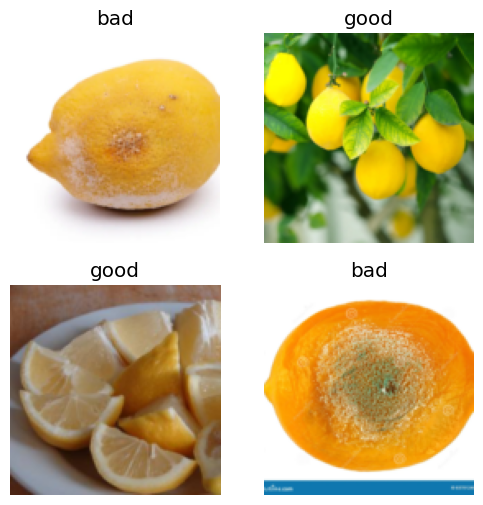

In [59]:
dls.show_batch(max_n=4)

OK, this looks good enough for a first training run now.

## 3️⃣ Build a model and train it

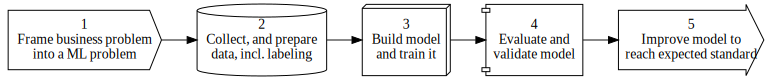

In [29]:
ml_process()

We are ready to build the model.

We will not build a neural network from scratch. Instead, we will use a **pre-trained models** and perform something called **transfer learning**.

We use a model that has been trained on a very large number of images to solve a specific classification problem, and then we will finetune it for our own classification problem.

Sounds like a big thing, but we will do this in two lines of code with `fastai`.



#### Architecture Selection


We select: RESNET 18.
> Resnet is a SOTA convolutional neural network (CNN), pre-trained on a large dataset called Imagenet, including 1,281,167 training images organized in 1,000 classes.
>
><img src="https://image-net.org/static_files/index_files/logo.jpg" height=20px>
>
> CNNs are the currently go-to type of architectures for computer vision problem and Resnet is an excellent choice. Resnet comes in several versions, including
> - resnet-18 with 18 layers
> <div align="center"><img src="https://www.charlier-tang.com/guided-dive/resources/img/resnet-18-01.png" width=75%></div>
> - resnet-34 with 34 layers
> <div align="center"><img src="https://www.charlier-tang.com/guided-dive/resources/img/resnet-34-01.png" height=300px></div>
> - resnet-50 with 50 layers

#### Create a model CNN model for computer vision
We create the model by telling the computer:
- the **data** to use to train the model: `dls`
- the **architecture** to use: `resnet18`. you can experiment with `resnet34` or `resnet50`.
- the **metrics** we want to monitor to evaluate the performance. We will use the **accuracy**, **precision** and **recall**. More in this later

The first time we run the cell, fastai will download the pretrained model parameters to use them. After that it will use the copy it has saved on disk.

In [60]:
learn = vision_learner(
    dls,
    resnet18,
    metrics=[accuracy, Precision(), Recall()]
    );

#### Train - Finetune the model

Now we are ready to train our model (`learner`).  As we use a pretrained model, we will **finetune** it.



How does the model learn? Three levels of explanation

###### Level 1


The model learns by "looking" at each image several times and modifying its parameters to improve the match between its predicted outputs and the training labels.

It is essentially an iterative optimization problem: what is the combination of parameter values that results to the best accuracy between predicted classes and labels (true class) across the training dataset and the validation dataset.

When we have a model that shows good performances (training and validation accuracy), we "hope" that it has **generalized**. This means that it will also perform well on all new data.

###### Level 2


The optimization process used for deep learning models is based on an iteration of **forward pass** and **back propagation pass**.

 <div align="center"><img src="https://www.2diyai.com/guided-dive/resources/img/backpropagation-2.gif" width=50%></div>

- Take a number of images out of the training dataset (in our case 16), called a batch
    - forward pass:
        - calculate a prediction for image in this batch
        - evaluate how remote the predictions are compared to the label provided in the training set (loss)
    - back propagation pass:
        - adjust all parameters to come closer to the correct prediction for all images in the batch, using the loss and its gradient w.r.t. each parameter.
- Start again, until all images are seen.

-

###### Level 3

There are many options available to train a model, and the choice of these options will make the model train well or not. A good model will train well as it achieves good performances on the training and validation sets (generalizes).
<div align="center"><img src="https://www.charlier-tang.com/guided-dive/resources/img/overfit-underfit.png" width=70%></div>

**Key options**:

- Learning the best parameters is an optimization problem: define the parammeters which minimize the loss function
<div align="center"><img src="https://www.charlier-tang.com/guided-dive/resources/img/sgd-1.png" width=70%></div>


- There are several optimizer algorithms available for training. Some are faster, some are less prone to fall in "local minima".
<div align="center"><img src="https://www.charlier-tang.com/guided-dive/resources/img/optimizers-2.gif" width=50%></div>


- The single most important factor for training, beside the optimizer, is the Learning Rate
<div align="center"><img src="https://www.charlier-tang.com/guided-dive/resources/img/lr.png" width=80%></div>



###### Training vs Finetuning

While training, the model "sees" all images in the training set, several times.

In deep learning jargon, one iteration over which the model sees all images in the training set once is called an **`epoch`**.

When models are trained from scratch, it is often necessary to use hundred or thousands of epochs. But in the case of a pre-trained model, a few epochs are often enough in first instance.



We run 5 or 10 epochs. But fee free to try less or more

At the end of each epoch, the system returns information of the metrics:

|epoch|train_loss|valid_loss|accuracy|precision_score|recall_score|time
|-----|----------|----------|--------|---------------|------------|----
0|1.081642|0.391084|0.833333|0.818182|0.818182|00:01

Accuracy, Precision and Recall are the three metrics we will follow. The closet to one the better.

Learning Rate (`lr`) is the single most important optimization parameter. It is the "speed" at which or "extend" to which the model correct itself at each iteration/pass. High learning rate train fast but also lead to divergence. Low learning rate make training very slow.

SuggestedLRs(valley=0.001737800776027143, minimum=0.00831763744354248, slide=0.005248074419796467, steep=3.981071586167673e-06)

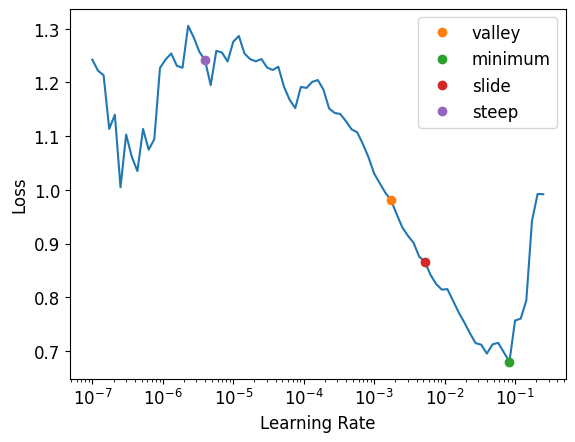

In [61]:
lr = learn.lr_find(suggest_funcs=(SuggestionMethod.Valley, SuggestionMethod.Minimum, SuggestionMethod.Slide, SuggestionMethod.Steep))
lr

In [62]:
learn = vision_learner(
    dls,
    resnet18,
    metrics=[accuracy, Precision(), Recall()]
    );

In [63]:
nr_epochs = 10

learn.fine_tune(nr_epochs, freeze_epochs=2, base_lr=lr.valley)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.248344,1.093650,0.583333,0.578947,0.846154,00:06
1,0.976557,0.509676,0.833333,0.800000,0.923077,00:07


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.673534,0.453170,0.833333,0.800000,0.923077,00:08
1,0.464145,0.393973,0.875000,0.812500,1.000000,00:12
2,0.386029,0.368576,0.875000,0.857143,0.923077,00:10
3,0.316443,0.187413,0.916667,0.866667,1.000000,00:08
4,0.260070,0.207607,0.916667,0.866667,1.000000,00:10
5,0.279461,0.090716,0.958333,0.928571,1.000000,00:09
6,0.242861,0.044796,1.000000,1.000000,1.000000,00:08
7,0.203468,0.037429,1.000000,1.000000,1.000000,00:10
8,0.176266,0.042120,1.000000,1.000000,1.000000,00:09
9,0.206858,0.037576,1.000000,1.000000,1.000000,00:08


How good is our model? The metrics have improved during training, but is the final result a good one?

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

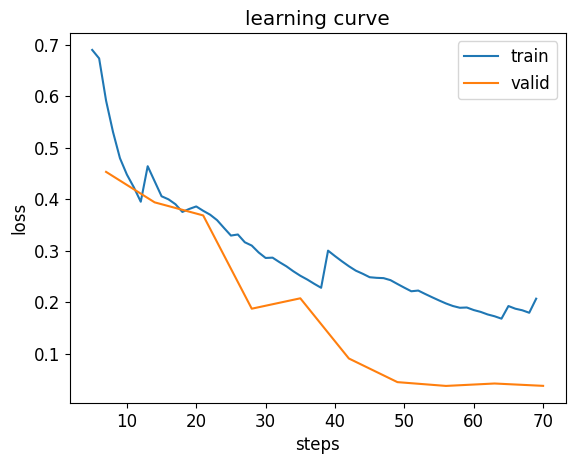

In [64]:
learn.recorder.plot_loss()

## 4️⃣ Evaluate the trained model

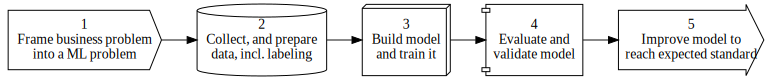

In [65]:
ml_process()

### Evaluate based on the validation set

We have reserved about 30% of the images for `validation`, with is checking how the model performs on images it has not seen during training. If the model **generalizes**, the result of these images should be good as well.

One good tool to evalute the model is to plot the confusion matrix:

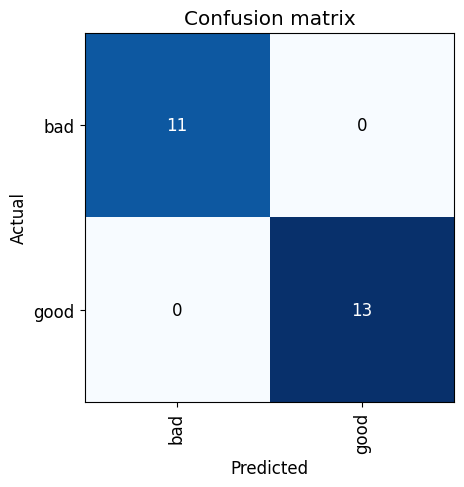

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [67]:
cm = interp.confusion_matrix()
print_metrics(cm)

Accurate predictions:                24 out of 24 validation images
False Positive preds:                 0 images classified as 'without_mask' but actually should be `with_mask`)
False Negative preds:                 0 images classified as `with_mask` but actually should be `without_mask`)

Accuracy:                           100.00 %
Precision for 'without_mask' preds: 100.00 %
Recall for 'without_mask' preds:    100.00 %


We also can visualize the images where we have errors

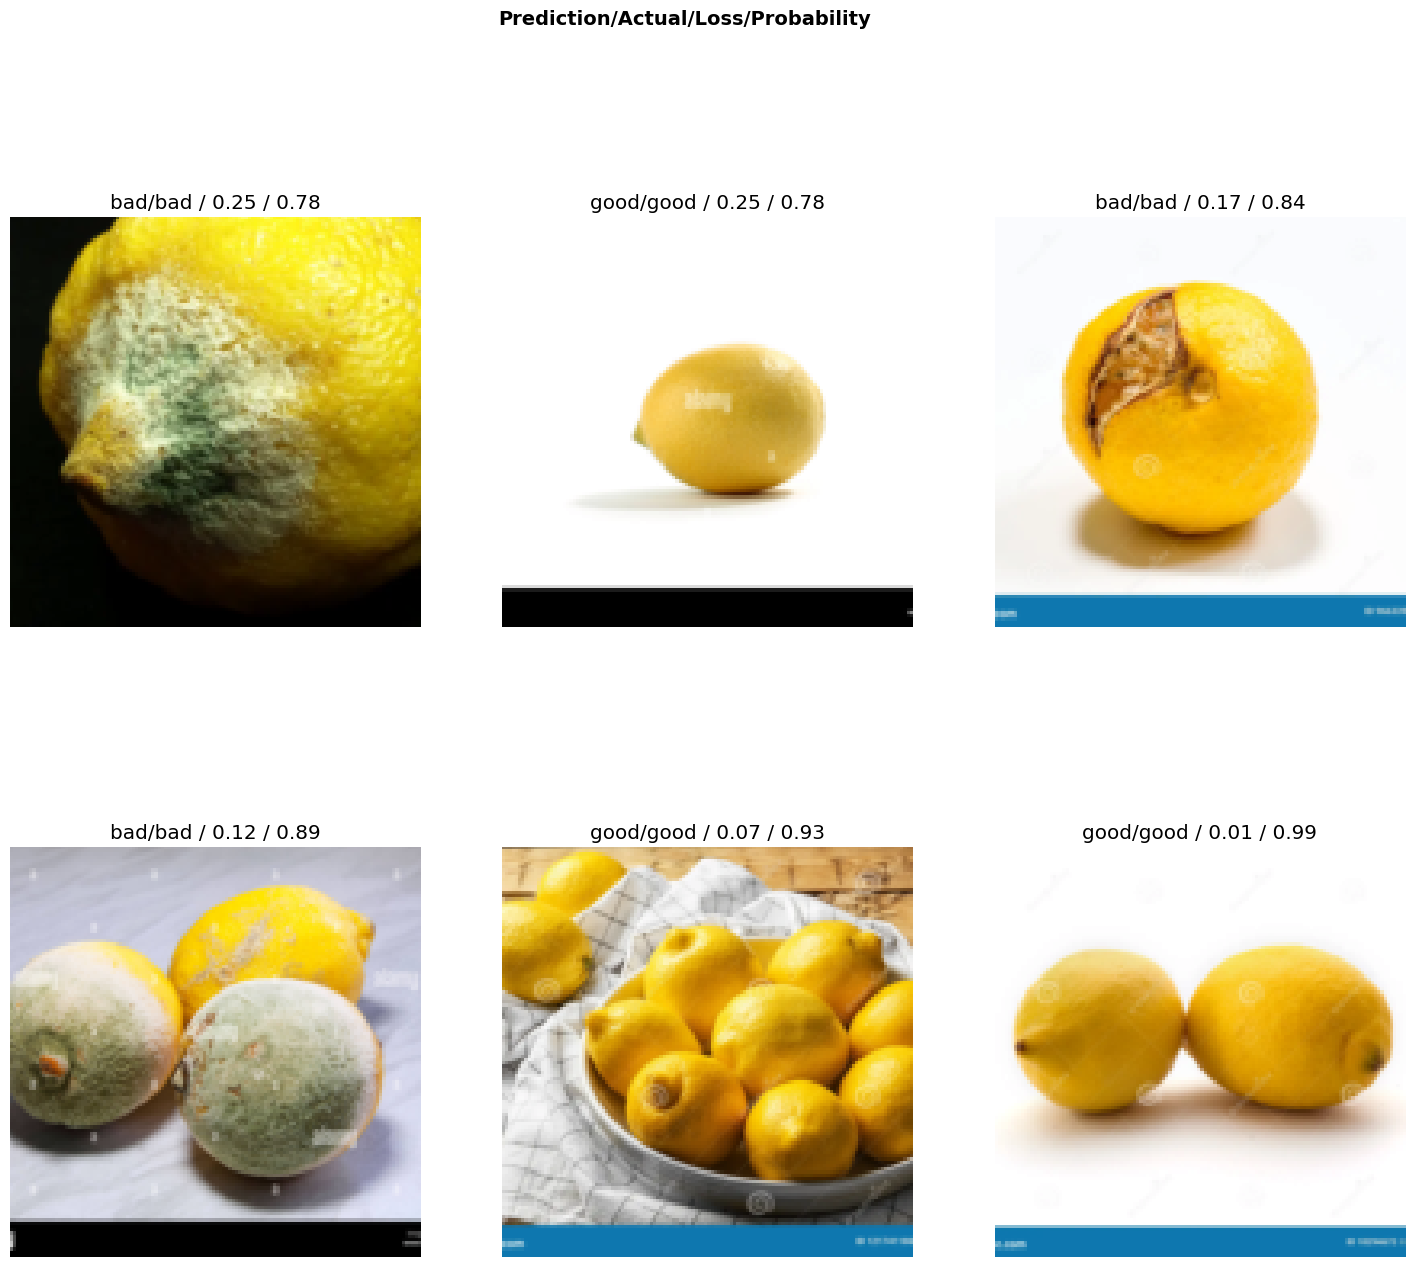

In [68]:
interp.plot_top_losses(k=6, figsize=(18,15))

### Evaluate with new data

We only had a small set of unseen images (validation set).

We should use a larger test set. We could download more images and create a bigger test set. But it hapens that there is a lemon dataset on Kaggle, which I have made available on AWS S3 for download.  It includes more than 2,000 labelled images. Let's use a subset of these to use as test set.

In [69]:
path_to_ds = untar_data('https://diyai-dives.s3.ap-southeast-1.amazonaws.com/datasets/lemon-img-dataset.zip')
path_to_ds

Path('/root/.fastai/data/lemon-img-dataset')

In [70]:
for p in path_to_ds.ls():
    if 'quality' not in p.name: rmtree(p)
    if 'quality' in p.name: shutil.move(p, p.parent / f"{p.name.replace('_quality','')}")

path_to_ds.ls()

(#2) [Path('/root/.fastai/data/lemon-img-dataset/good'),Path('/root/.fastai/data/lemon-img-dataset/bad')]

In [ ]:
# rmtree(path_to_ds)

In [71]:
test_path = path_to_ds
count_files(test_path)

1,125 in folder good
951 in folder bad


The code below randomly selects a small number of images from the huge dataset to use as a test set.

In [72]:
nbr_test_images = 100

test_image_fnames = get_image_files(test_path)
idxs = np.random.choice(len(test_image_fnames)-1, nbr_test_images)
test_image_fnames = test_image_fnames[idxs]

#### Create the test set
Now we create a test dataset. To do so, we use the same dataloaders`dls` as before, but we tell the computer to look at the images from the list of image file names `test_image_fnames`, and to perform the same type of actions (recipe) as for the training dataset.

In [73]:
test_dl = dls.test_dl(test_image_fnames, with_labels=True)

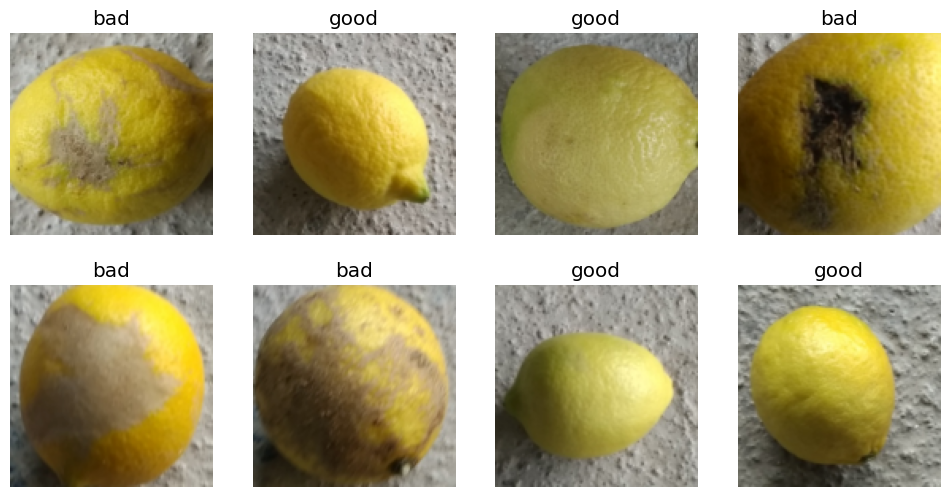

In [74]:
test_dl.show_batch(max_n=16)

#### Predict and evaluate the test set

Now we do the interpretation again, but using the test dataloader `test_dl`, instead of the validation set.

In [ ]:
test_results = learn.validate(dl=test_dl)
for i, m in enumerate(learn.metrics):
    print(f"{m.name:16s}:  {test_results[i+1]*100:.1f}%")

In [ ]:
interp_test = ClassificationInterpretation.from_learner(learn, dl=test_dl)

In [ ]:
interp_test.plot_confusion_matrix()

In [ ]:
cm = interp.confusion_matrix()
print_metrics(cm)

**What to watch**:
- Do we not let pass many people without a mask ?

- Do we block many people with a mask ? This woult raise many complaints 💣 !

Let's have a look at the biggest mistakes

In [ ]:
interp_test.plot_top_losses(k=9, figsize=(15, 15))

It is clear that the model misses quite a few cases when the image is not that good. But a good model should be able to see that, we, humans, can.

## 5️⃣ Improve the model by using more data

In [ ]:
ml_process()

We have seen that we can get a decent model with only between 50 and 100 images of each class. But we also saw that the result need improvement. The best way to get more out of the model is to feed it more data.

We could download 400 images and clean these, and then retrain the model.

But let's go crazy !

We will use the **Lemon** dataset already available on Kaggle. With 2,000 images, we are going all the way toward large dataset.

### Create the dataloaders

This is exactly the same recipe as before, except that we keep a vaidation set of 30% as we have more images in general.

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(128),
                   splitter=RandomSplitter(valid_pct=0.4, seed=42),
                   )

Now we apply this "recipe" to all images in the folder that includes all images of Facemask-44k. It will take a little while as there are many images.

In [ ]:
dls = dblock.dataloaders(path_to_ds, bs=32)

In [ ]:
dls.show_batch(max_n=16)

## Create a new model and train it

Be prepared, training will take longer then before. We have close to 300 times more images. You can count on 2 to 4 minutes per epoch.

It is longer, but as a comparison, a full training from scratch of resnet would take something like **14 days** on a normal GPU like we have here.

We create a model like before and then finetune it for 5 epochs

In [ ]:
learn = vision_learner(
    dls,
    resnet18,
    metrics=[accuracy, Precision(), Recall()]
    )

In [ ]:
lr = learn.lr_find(suggest_funcs=[SuggestionMethod.Valley, SuggestionMethod.Minimum, SuggestionMethod.Slide, SuggestionMethod.Steep])

In [ ]:
learn.fine_tune(freeze_epochs=2, epochs=10, base_lr = lr.valley)

In [ ]:
learn.recorder.plot_loss();

### Evaluate the results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

👍 This is a much better performance. We still have a few mistakenly classified images but a much smaller percentage on a total of more than 13,000 images in the validation set (30% of 44,000).

The metrics on the validation set are also much better:

Model | Accuracy | Precision | Recall
:-----|:--------:|:---------:|:-----:
DGG   | 0.875000 | 0.833333  | 0.909091
44k   | 0.980200 | 0.981170 | 0.978976


We can expect much less complaints by management about wasting good lemons !

In addition by looking at the top mistakes, it is clear that some of them are wrongly classified or just unclassifiable even by humans.

In [ ]:
interp.plot_top_losses(k=4, figsize=(8, 8))

# Final comments and next step

From here, there are many techniques to further improve and stress test the model. But this is beyond what we wanted you to experience during this session.

The next steps, beside further improvement, will include:
- saving the model so that it can be used by others
- creating an application using the saved model and easiy classify new images.

In our case, the application will be integrated into our existing temperature system and interface with the access control system. This is pure IT design, and will use the outcome of this discovery phase to build a strong and resilient model,

Do not forget to save your notebook before you close this window.